In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils2 import confidence_ellipse

In [10]:
data = pd.read_csv('C:\Yedek\Dosyalar\stuff\ders\csv files\\bayes_features.csv')
data.head()

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


In [23]:
print(data.sentiment.unique())

[1. 0.]


In [ ]:
fig, ax = plt.subplots(figsize=(7, 7));
colors = ['red', 'green']
sentiments = ['negative', 'positive']

index = data.index

# Color base on sentiment
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

ax.legend(loc='best')

plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive")
plt.ylabel("Negative")
plt.show()

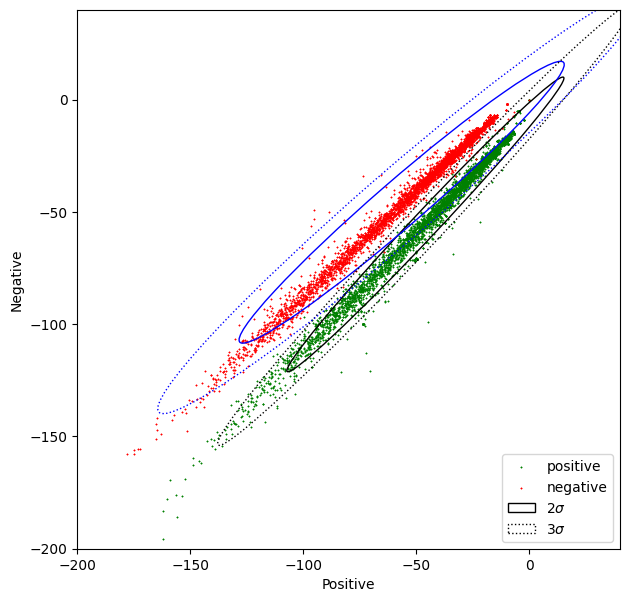

In [45]:
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['red', 'green']
sentiments = ['negative', 'positive']
index = data.index

for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

plt.xlim(-200,40)
plt.ylim(-200,40)

plt.xlabel("Positive")
plt.ylabel("Negative")

data_pos = data[data.sentiment == 1] #Filter
data_neg = data[data.sentiment == 0] #Filter

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='blue')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='blue', linestyle=':')
ax.legend(loc='lower right')

plt.show()

In [46]:
data2 = data.copy()

data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50 # Modify the negative attribute
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50 # Modify the positive attribute

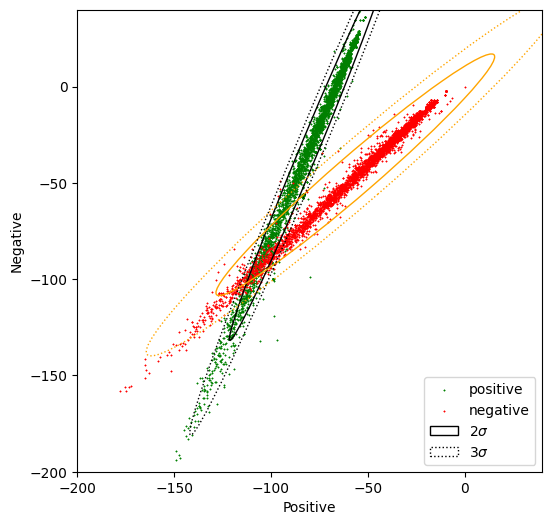

In [52]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (6, 6))

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
index = data2.index

# Color base on sentiment
for sentiment in data2.sentiment.unique():
    ix = index[data2.sentiment == sentiment]
    ax.scatter(data2.iloc[ix].positive, data2.iloc[ix].negative, c=colors[int(sentiment)], s=0.1, marker='*', label=sentiments[int(sentiment)])

#ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data[data2.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend(loc='lower right')

plt.show()